In [101]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import pickle


In [102]:
df=pd.read_csv('/content/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [103]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [104]:
df.shape

(4269, 13)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [106]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# Target Variable Distribution

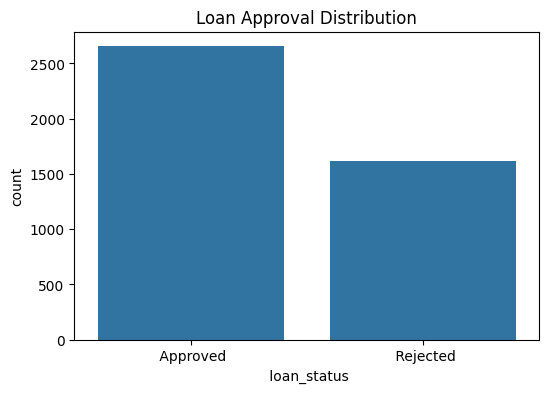

In [107]:
plt.figure(figsize=(6,4))
sns.countplot(x=' loan_status',data=df)
plt.title("Loan Approval Distribution")
plt.show()

# Education vs Loan Status

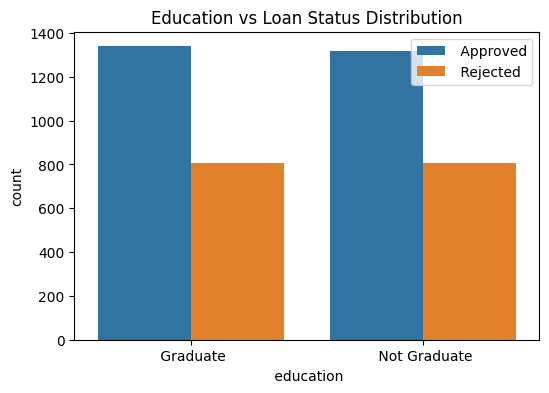

In [108]:
plt.figure(figsize=(6,4))
sns.countplot(x=' education',hue=' loan_status',data=df)
plt.title("Education vs Loan Status Distribution")
plt.legend(loc='best')
plt.show()

# Self Employed vs Loan Status

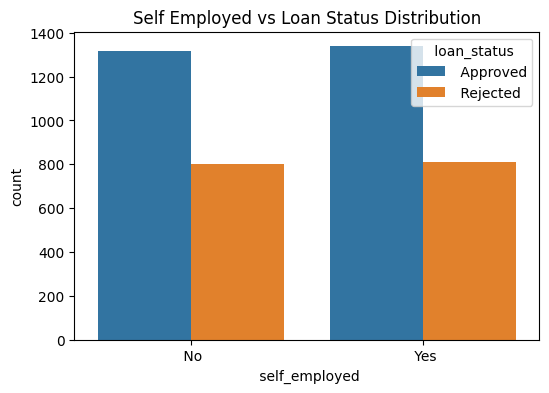

In [109]:
plt.figure(figsize=(6,4))
sns.countplot(x=" self_employed",hue=" loan_status",data=df)
plt.title("Self Employed vs Loan Status Distribution")
plt.show()

# Income vs Loan Status

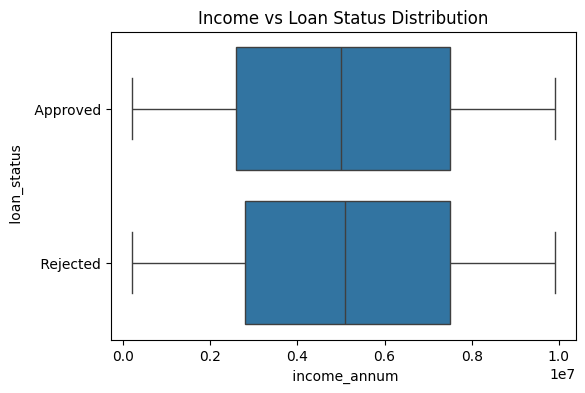

In [110]:
plt.figure(figsize=(6,4))
sns.boxplot(x=' income_annum',y=' loan_status',data=df)
plt.title("Income vs Loan Status Distribution")
plt.show()

# CIBIL Score Impact

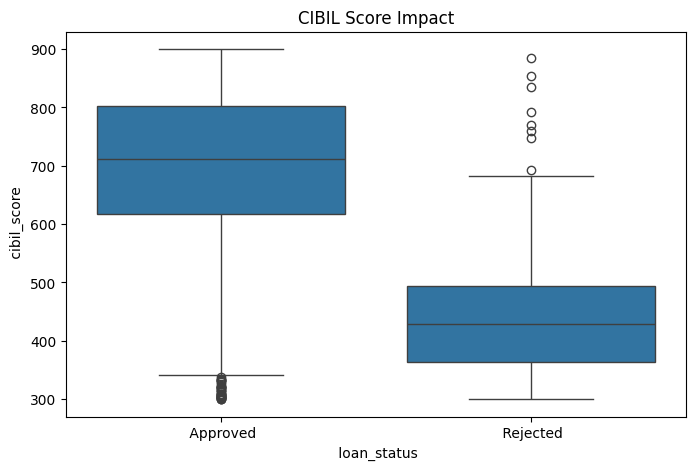

In [111]:
plt.figure(figsize=(8,5))
sns.boxplot(x=' loan_status', y=' cibil_score', data=df)
plt.title("CIBIL Score Impact")
plt.show()


In [112]:
df.drop(columns="loan_id",axis=1,inplace=True)

In [113]:
le=LabelEncoder()

df[' education']=le.fit_transform(df[' education'])
df[' self_employed']=le.fit_transform(df[' self_employed'])

In [114]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [115]:
df.columns = df.columns.str.strip()


In [116]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [118]:
df['loan_status'] = df['loan_status'].str.strip()


In [119]:
df['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

In [120]:
df['loan_status'] = df['loan_status'].map({
    'Approved': 1,
    'Rejected': 0
})


In [122]:
df['loan_status'].value_counts()


,count
loan_status,
1,2656
0,1613


In [123]:
df['loan_status'].value_counts()


,count
loan_status,
1,2656
0,1613


In [126]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']


In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [128]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# LOGISTIC REGRESSION

In [129]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.9133489461358314


# DECISION TREE

In [153]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.9812646370023419


# RANDOM FOREST

In [143]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [144]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=12,
    min_samples_leaf=20,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=12, min_samples_leaf=20, n_estimators=500,
                       random_state=42)

In [145]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9742388758782201
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       323
           1       0.98      0.98      0.98       531

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [155]:
def check_loan_status(sample_input_df):
    assert list(sample_input_df.columns) == list(X.columns), "Feature mismatch"

    prediction = rf.predict(sample_input_df)[0]

    if prediction == 1:
        print("Loan Approved")
    else:
        print("Loan Rejected")


In [156]:
sample_input = pd.DataFrame({
    'no_of_dependents': [0],
    'education': [1],          # Graduate
    'self_employed': [0],      # No
    'income_annum': [14000000],
    'loan_amount': [6000000],
    'loan_term': [5],
    'cibil_score': [820],
    'residential_assets_value': [16000000],
    'commercial_assets_value': [8000000],
    'luxury_assets_value': [4000000],
    'bank_asset_value': [10000000]
})

check_loan_status(sample_input)


Loan Approved


In [157]:
sample_input = pd.DataFrame({
    'no_of_dependents': [6],
    'education': [0],          # Not Graduate
    'self_employed': [1],      # Yes
    'income_annum': [1200000],
    'loan_amount': [28000000],
    'loan_term': [20],
    'cibil_score': [320],
    'residential_assets_value': [0],
    'commercial_assets_value': [0],
    'luxury_assets_value': [0],
    'bank_asset_value': [100000]
})

check_loan_status(sample_input)


Loan Rejected


In [152]:
import pickle

pickle.dump(rf, open('loan_model.pkl', 'wb'))
